In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from fancyimpute import KNN

C:\Users\user\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
os.chdir('F:\Edwisor')

In [152]:
marketing_train=pd.read_csv('marketingCampaign.csv')

In [148]:
marketing_train.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.0,admin.,single,university.degree,unknown,no,no,cellular,nov,mon,...,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,no
1,NaN,blue-collar,married,NaN,no,no,no,cellular,jul,mon,...,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.0,0,no
2,42.0,technician,married,high.school,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,999.0,0,no
3,55.0,management,divorced,NaN,unknown,yes,yes,cellular,jul,wed,...,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0,no
4,NaN,admin.,divorced,university.degree,no,yes,no,cellular,may,tue,...,1,failure,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,no


In [100]:
missing_val=pd.DataFrame(marketing_train.isnull().sum())

In [101]:
missing_val=missing_val.reset_index()

In [102]:
missing_val=missing_val.rename(columns={'index':'Variables',0:'missing_perc'})

In [103]:
missing_val=missing_val.sort_values('missing_perc',ascending=False).reset_index(drop=True)

In [104]:
missing_val['missing_perc']=(missing_val['missing_perc']/len(marketing_train))*100

In [105]:
missing_val

,Variables,missing_perc
0,schooling,29.066631
1,custAge,24.332344
2,day_of_week,9.589965
3,previous,0.000000
4,pastEmail,0.000000
5,pmonths,0.000000
6,nr.employed,0.000000
7,euribor3m,0.000000
8,cons.conf.idx,0.000000
9,cons.price.idx,0.000000


In [35]:
missing_val.to_csv('missing_perc',index=False)

In [193]:
marketing_train=pd.read_csv('marketingCampaign.csv')

In [39]:
#Actual=30
#Mean=40
#Median=38
#KNN=

In [181]:
#marketing_train['custAge'].iloc[70]=np.nan
marketing_train['custAge'].iloc[70]

29.0

In [162]:
#marketing_train['custAge']=marketing_train['custAge'].fillna(marketing_train['custAge'].mean())
marketing_train['custAge']=marketing_train['custAge'].fillna(marketing_train['custAge'].median())

In [198]:
marketing_train.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.0,0,2,6.0,1,0,0,0,7,1.0,...,0,1,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,0
1,NaN,1,1,NaN,0,0,0,0,3,1.0,...,0,1,1.4,93.918,-42.7,4.960,5228.1,999.0,0,0
2,42.0,9,1,3.0,0,0,0,1,6,1.0,...,0,1,1.1,93.994,-36.4,4.857,5191.0,999.0,0,0
3,55.0,4,0,NaN,1,2,2,0,3,4.0,...,0,1,1.4,93.918,-42.7,4.962,5228.1,999.0,0,0
4,NaN,0,0,6.0,0,2,0,0,6,3.0,...,1,0,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,0


In [195]:
for i in range(0,marketing_train.shape[1]):
    if(marketing_train.iloc[:,i].dtypes=='object'):
        marketing_train.iloc[:,i]=pd.Categorical(marketing_train.iloc[:,i])
        marketing_train.iloc[:,i]=marketing_train.iloc[:,i].cat.codes

In [197]:
for i in range(0,marketing_train.shape[1]):
    marketing_train.iloc[:,i]=marketing_train.iloc[:,i].replace(-1,np.nan)

In [199]:
marketing_train=pd.DataFrame(KNN(k=3).complete(marketing_train),columns=marketing_train.columns)

Imputing row 1/7414 with 0 missing, elapsed time: 25.975
Imputing row 101/7414 with 1 missing, elapsed time: 29.068
Imputing row 201/7414 with 0 missing, elapsed time: 29.077
Imputing row 301/7414 with 1 missing, elapsed time: 29.087
Imputing row 401/7414 with 0 missing, elapsed time: 29.094
Imputing row 501/7414 with 0 missing, elapsed time: 29.102
Imputing row 601/7414 with 0 missing, elapsed time: 29.111
Imputing row 701/7414 with 1 missing, elapsed time: 29.119
Imputing row 801/7414 with 1 missing, elapsed time: 29.127
Imputing row 901/7414 with 1 missing, elapsed time: 29.135
Imputing row 1001/7414 with 0 missing, elapsed time: 29.144
Imputing row 1101/7414 with 1 missing, elapsed time: 29.153
Imputing row 1201/7414 with 1 missing, elapsed time: 29.161
Imputing row 1301/7414 with 1 missing, elapsed time: 29.171
Imputing row 1401/7414 with 0 missing, elapsed time: 29.178
Imputing row 1501/7414 with 1 missing, elapsed time: 29.186
Imputing row 1601/7414 with 1 missing, elapsed time:

In [188]:
marketing_train['custAge'].loc[70]

29.0

In [212]:
df=marketing_train.copy()
#marketing_train=df.copy()

In [215]:
marketing_train.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.00000,0.0,2.0,6.000000,1.0,0.0,0.0,0.0,7.0,1.0,...,0.0,1.0,-0.1,93.200,-42.0,4.191,5195.8,999.0,0.0,0.0
1,44.00000,1.0,1.0,4.666667,0.0,0.0,0.0,0.0,3.0,1.0,...,0.0,1.0,1.4,93.918,-42.7,4.960,5228.1,999.0,0.0,0.0
2,42.00000,9.0,1.0,3.000000,0.0,0.0,0.0,1.0,6.0,1.0,...,0.0,1.0,1.1,93.994,-36.4,4.857,5191.0,999.0,0.0,0.0
3,55.00000,4.0,0.0,4.071429,1.0,2.0,2.0,0.0,3.0,4.0,...,0.0,1.0,1.4,93.918,-42.7,4.962,5228.1,999.0,0.0,0.0
4,36.80764,0.0,0.0,6.000000,0.0,2.0,0.0,0.0,6.0,3.0,...,1.0,0.0,-1.8,92.893,-46.2,1.291,5099.1,999.0,1.0,0.0


In [121]:
%matplotlib inline

{'boxes': [<matplotlib.lines.Line2D at 0x2958074ea90>],
 'caps': [<matplotlib.lines.Line2D at 0x295807424e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x29580a24198>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x29580742d30>],
 'whiskers': [<matplotlib.lines.Line2D at 0x2958074ebe0>,
  <matplotlib.lines.Line2D at 0x295807420b8>]}

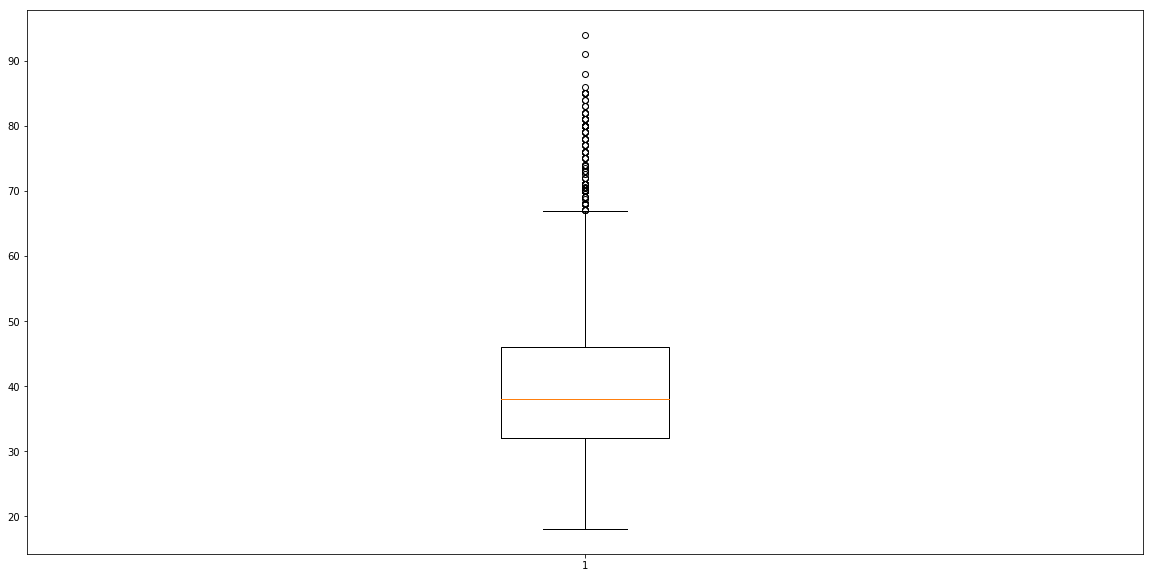

In [203]:
plt.figure(figsize=(20,10))
plt.boxplot(marketing_train['custAge'])

In [204]:
marketing_train.columns

Index(['custAge', 'profession', 'marital', 'schooling', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'pmonths', 'pastEmail',
       'responded'],
      dtype='object')

In [207]:
cnames=['custAge', 'campaign', 'pdays','previous', 'emp.var.rate','cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed', 'pmonths', 'pastEmail']

In [208]:
cnames

['custAge',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'pmonths',
 'pastEmail']

In [209]:
#Droping the Outliers
for i in cnames:
    q75,q25= np.percentile(marketing_train.loc[:,i],[75,25])
    iqr=q75-q25
    min=q25-(iqr*1.5)
    max=q75+(iqr*1.5)
    print(min)
    print(max)
    
    marketing_train=marketing_train.drop(marketing_train[marketing_train.loc[:,i]<min].index)
    marketing_train=marketing_train.drop(marketing_train[marketing_train.loc[:,i]>max].index)

11.002022806413624
66.99878631615182
-2.0
6.0
999.0
999.0
0.0
0.0
-4.85
5.15
92.00900000000001
95.185
-52.150000000000006
-26.949999999999992
2.6095
6.3735
5135.349999999999
5283.750000000001
999.0
999.0
0.0
0.0


In [216]:
marketing_train.shape

(7414, 22)

In [ ]:
#Replacing the outliers with Mean, median, KNN

In [217]:
q75,q25=np.percentile(marketing_train['custAge'],[75,25])

In [222]:
iqr=q75-q25

In [220]:
min=q25-(iqr*1.5)
max=q75+(iqr*1.5)
print(min)
print(max)

11.002022806413624
66.99878631615182


In [223]:
marketing_train.loc[marketing_train['custAge']<min,:'custAge']=np.nan
marketing_train.loc[marketing_train['custAge']>max,:'custAge']=np.nan

In [225]:
missing_val1=pd.DataFrame(marketing_train.isnull().sum())

In [226]:
marketing_train=pd.DataFrame

,0
custAge,101
profession,0
marital,0
schooling,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0
